In [19]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [20]:
class AgentState(TypedDict):
    num1: float
    num2: float
    operation1: str
    final_num1: float
    num3: float
    num4: float
    operation2: str
    final_num2: float

In [21]:
def add_node1(state: AgentState) -> AgentState:
    state["final_num1"] = state['num1'] + state['num2']
    return state

def sub_node1(state: AgentState) -> AgentState:
    state["final_num1"] = state['num1'] - state['num2']
    return state

def router1(state: AgentState) -> AgentState:
    if state['operation1'] == "+":
        return "addtion_operation1"
    elif state["operation1"] == "-":
        return "subtraction_operation1"

In [22]:
def add_node2(state: AgentState) -> AgentState:
    state["final_num2"] = state['num3'] + state['num4']
    return state

def sub_node2(state: AgentState) -> AgentState:
    state["final_num2"] = state['num3'] - state['num4']
    return state

def router2(state: AgentState) -> AgentState:
    if state['operation2'] == "+":
        return "addtion_operation2"
    elif state["operation2"] == "-":
        return "subtraction_operation2"

In [23]:
graph = StateGraph(AgentState)
graph.add_node("add_node1", add_node1)
graph.add_node("sub_node1", sub_node1)
graph.add_node("router1", lambda state: state)
graph.add_edge(START, "router1")
graph.add_conditional_edges(
    "router1",
    router1,
    {
        "addtion_operation1":"add_node1",
        "subtraction_operation1":"sub_node1"
    }
)
graph.add_edge("add_node1", "router2")
graph.add_edge("sub_node1", "router2")

graph.add_node("add_node2", add_node2)
graph.add_node("sub_node2", sub_node2)
graph.add_node("router2", lambda state: state)
graph.add_conditional_edges(
    "router2",
    router2,
    {
        "addtion_operation2":"add_node2",
        "subtraction_operation2":"sub_node2"
    }
)
graph.add_edge("add_node2", END)
graph.add_edge("sub_node2", END)
app = graph.compile()

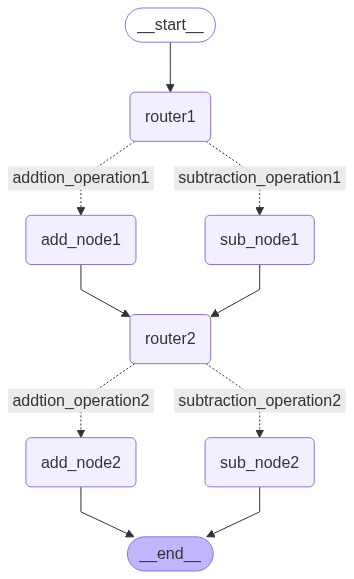

In [24]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [25]:
result = app.invoke({"num1":10, "num2": 5, "operation1": "+", "num3": 10, "num4": 5, "operation2": "-"})

In [26]:
result

{'num1': 10,
 'num2': 5,
 'operation1': '+',
 'final_num1': 15,
 'num3': 10,
 'num4': 5,
 'operation2': '-',
 'final_num2': 5}